In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N_init          = 1000 # Number of initial carbon 14 atoms
time           = 100000 # Length of simulation
tsteps = 1000 # Number of timesteps
t_half_C   = 5730 # Half life of carbon 14 (in years)



In [2]:
def analytic_C(N_init, t): # Analytic solution for number of Carbon 14 atoms as it decays
    return N_init * np.exp (-t / t_half_C * np.log(2))

def analytic_N(N_init,t): # Analytic solution for number of stable nitrogen atoms
      return (N_init) * (1 - np.exp (-t / t_half_C * np.log(2)))

In [3]:
def MC(N_init, time, tsteps): #Monte Carlo Function which outputs number of C and N atoms
    dt             = time / tsteps #Calculating the interval between each time step
    count_C   = np.zeros((tsteps)) #initialise
    count_N = np.zeros((tsteps))
    atoms          = np.ones((N_init)) 
    p_decay_C    = 1 - np.exp(-dt / t_half_C * np.log(2)) 
    for i in range(tsteps):
        
        count_C[i]   = (atoms == 1).sum() 
        count_N[i] = (atoms == 2).sum()
        
        for j in range(N_init):
            
            if atoms[j] == 1: 
                if np.random.random() <= p_decay_C:
                    atoms[j] = 2
                else:
                    atoms[j] = 1
            elif atoms[j] == 2:
                    atoms[j] = 2
                
    return count_C, count_N

In [4]:
t = np.arange(0, time, time/tsteps) 
n_analytic_C = analytic_C(N_init,  t) 
n_analytic_N = analytic_N(N_init,  t) 
n_C, n_N = MC(N_init, time, tsteps) 

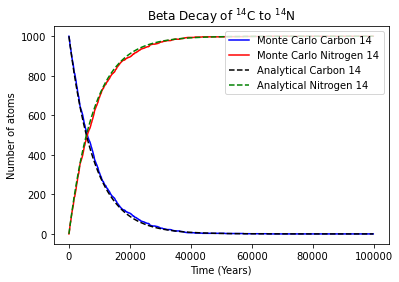

In [5]:

plt.plot(t, n_C, label = 'Monte Carlo Carbon 14', color = 'blue')
plt.plot(t, n_N, label = 'Monte Carlo Nitrogen 14', color = 'red')
plt.plot(t, n_analytic_C, label = 'Analytical Carbon 14', color = 'black', linestyle = '--')
plt.plot(t, n_analytic_N, label = 'Analytical Nitrogen 14', color = 'green', linestyle = '--')
plt.title('Beta Decay of $^{14}$C to $^{14}$N')
plt.ylabel('Number of Atoms')
plt.xlabel('Time (Years)')
plt.legend(loc='best') 
